# Online Shoppers Purchasing Intention Dataset - Data Science Analysis

**Dataset Source:** https://archive.ics.uci.edu/dataset/468/online+shoppers+purchasing+intention+dataset

## Dataset Overview
- **Total Sessions:** 12,330
- **Features:** 17 (10 numerical, 8 categorical)
- **Target:** Revenue (Purchase vs No Purchase)
- **Class Distribution:** 84.5% No Purchase (10,422), 15.5% Purchase (1,908)
- **Task:** Classification
- **Missing Values:** No

In [1]:
# Install required package
!pip install ucimlrepo xgboost -q


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: /usr/bin/python -m pip install --upgrade pip


In [2]:
# Fetch dataset from UCI Repository
from ucimlrepo import fetch_ucirepo

online_shoppers_purchasing_intention_dataset = fetch_ucirepo(id=468)

# Data (as pandas dataframes)
X = online_shoppers_purchasing_intention_dataset.data.features
y = online_shoppers_purchasing_intention_dataset.data.targets

print("Dataset loaded successfully!")
print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")

Dataset loaded successfully!
Features shape: (12330, 17)
Target shape: (12330, 1)


# 1. Import Libraries

In [3]:
# Import all necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    classification_report, confusion_matrix, 
    roc_auc_score, roc_curve,
    accuracy_score, precision_score, 
    recall_score, f1_score
)

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

import warnings
warnings.filterwarnings('ignore')

# Set visualization style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

print("✓ All libraries imported successfully!")

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


✓ All libraries imported successfully!


# 2. Data Exploration & Understanding

In [4]:
# Combine features and target into a single dataframe
df = X.copy()
df['Revenue'] = y

print("Dataset Shape:", df.shape)
print("\nColumn Names:")
print(df.columns.tolist())
print("\nFirst 5 rows:")
df.head()

Dataset Shape: (12330, 18)

Column Names:
['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType', 'Weekend', 'Revenue']

First 5 rows:


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [5]:
# Display data information
print("=" * 70)
print("DATA INFORMATION")
print("=" * 70)
df.info()

print("\n" + "=" * 70)
print("MISSING VALUES")
print("=" * 70)
missing = df.isnull().sum()
print(missing[missing > 0] if missing.sum() > 0 else "No missing values found!")

print("\n" + "=" * 70)
print("DUPLICATE ROWS")
print("=" * 70)
print(f"Number of duplicate rows: {df.duplicated().sum()}")

DATA INFORMATION
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  Traff

In [6]:
# Descriptive statistics for numerical features
print("=" * 100)
print("DESCRIPTIVE STATISTICS FOR NUMERICAL FEATURES")
print("=" * 100)
df.describe().T

DESCRIPTIVE STATISTICS FOR NUMERICAL FEATURES


,count,mean,std,min,25%,50%,75%,max
Administrative,12330.0,2.315166,3.321784,0.0,0.000000,1.000000,4.000000,27.000000
Administrative_Duration,12330.0,80.818611,176.779107,0.0,0.000000,7.500000,93.256250,3398.750000
Informational,12330.0,0.503569,1.270156,0.0,0.000000,0.000000,0.000000,24.000000
Informational_Duration,12330.0,34.472398,140.749294,0.0,0.000000,0.000000,0.000000,2549.375000
ProductRelated,12330.0,31.731468,44.475503,0.0,7.000000,18.000000,38.000000,705.000000
ProductRelated_Duration,12330.0,1194.746220,1913.669288,0.0,184.137500,598.936905,1464.157214,63973.522230
BounceRates,12330.0,0.022191,0.048488,0.0,0.000000,0.003112,0.016813,0.200000
ExitRates,12330.0,0.043073,0.048597,0.0,0.014286,0.025156,0.050000,0.200000
PageValues,12330.0,5.889258,18.568437,0.0,0.000000,0.000000,0.000000,361.763742
SpecialDay,12330.0,0.061427,0.198917,0.0,0.000000,0.000000,0.000000,1.000000


TARGET VARIABLE (REVENUE) DISTRIBUTION

Count:
Revenue
False    10422
True      1908
Name: count, dtype: int64

Percentage:
Revenue
False    84.525547
True     15.474453
Name: proportion, dtype: float64


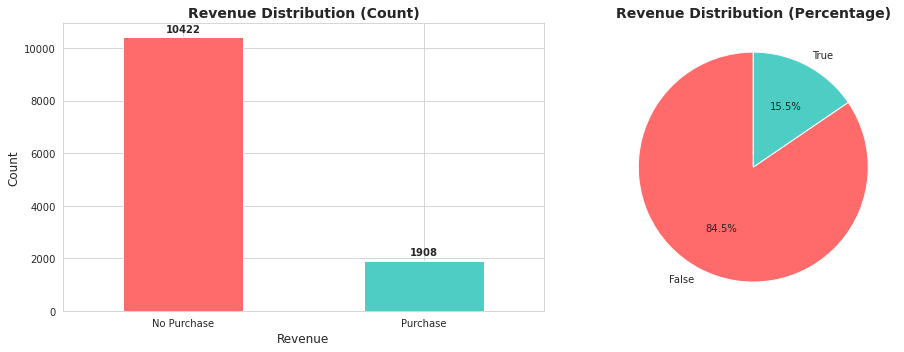


⚠️  Class Imbalance Ratio: 5.46:1 (No Purchase : Purchase)


In [7]:
# Target variable distribution
print("=" * 70)
print("TARGET VARIABLE (REVENUE) DISTRIBUTION")
print("=" * 70)
print("\nCount:")
print(df['Revenue'].value_counts())
print("\nPercentage:")
print(df['Revenue'].value_counts(normalize=True) * 100)

# Visualize target distribution
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

# Count plot
df['Revenue'].value_counts().plot(kind='bar', ax=ax[0], color=['#FF6B6B', '#4ECDC4'])
ax[0].set_title('Revenue Distribution (Count)', fontsize=14, fontweight='bold')
ax[0].set_xlabel('Revenue', fontsize=12)
ax[0].set_ylabel('Count', fontsize=12)
ax[0].set_xticklabels(['No Purchase', 'Purchase'], rotation=0)
for i, v in enumerate(df['Revenue'].value_counts()):
    ax[0].text(i, v + 200, str(v), ha='center', fontweight='bold')

# Pie chart
df['Revenue'].value_counts().plot(kind='pie', ax=ax[1], autopct='%1.1f%%', 
                                   colors=['#FF6B6B', '#4ECDC4'], startangle=90)
ax[1].set_title('Revenue Distribution (Percentage)', fontsize=14, fontweight='bold')
ax[1].set_ylabel('')

plt.tight_layout()
plt.show()

# Class imbalance ratio
imbalance_ratio = df['Revenue'].value_counts()[False] / df['Revenue'].value_counts()[True]
print(f"\n⚠️  Class Imbalance Ratio: {imbalance_ratio:.2f}:1 (No Purchase : Purchase)")

# 3. Exploratory Data Analysis (EDA)

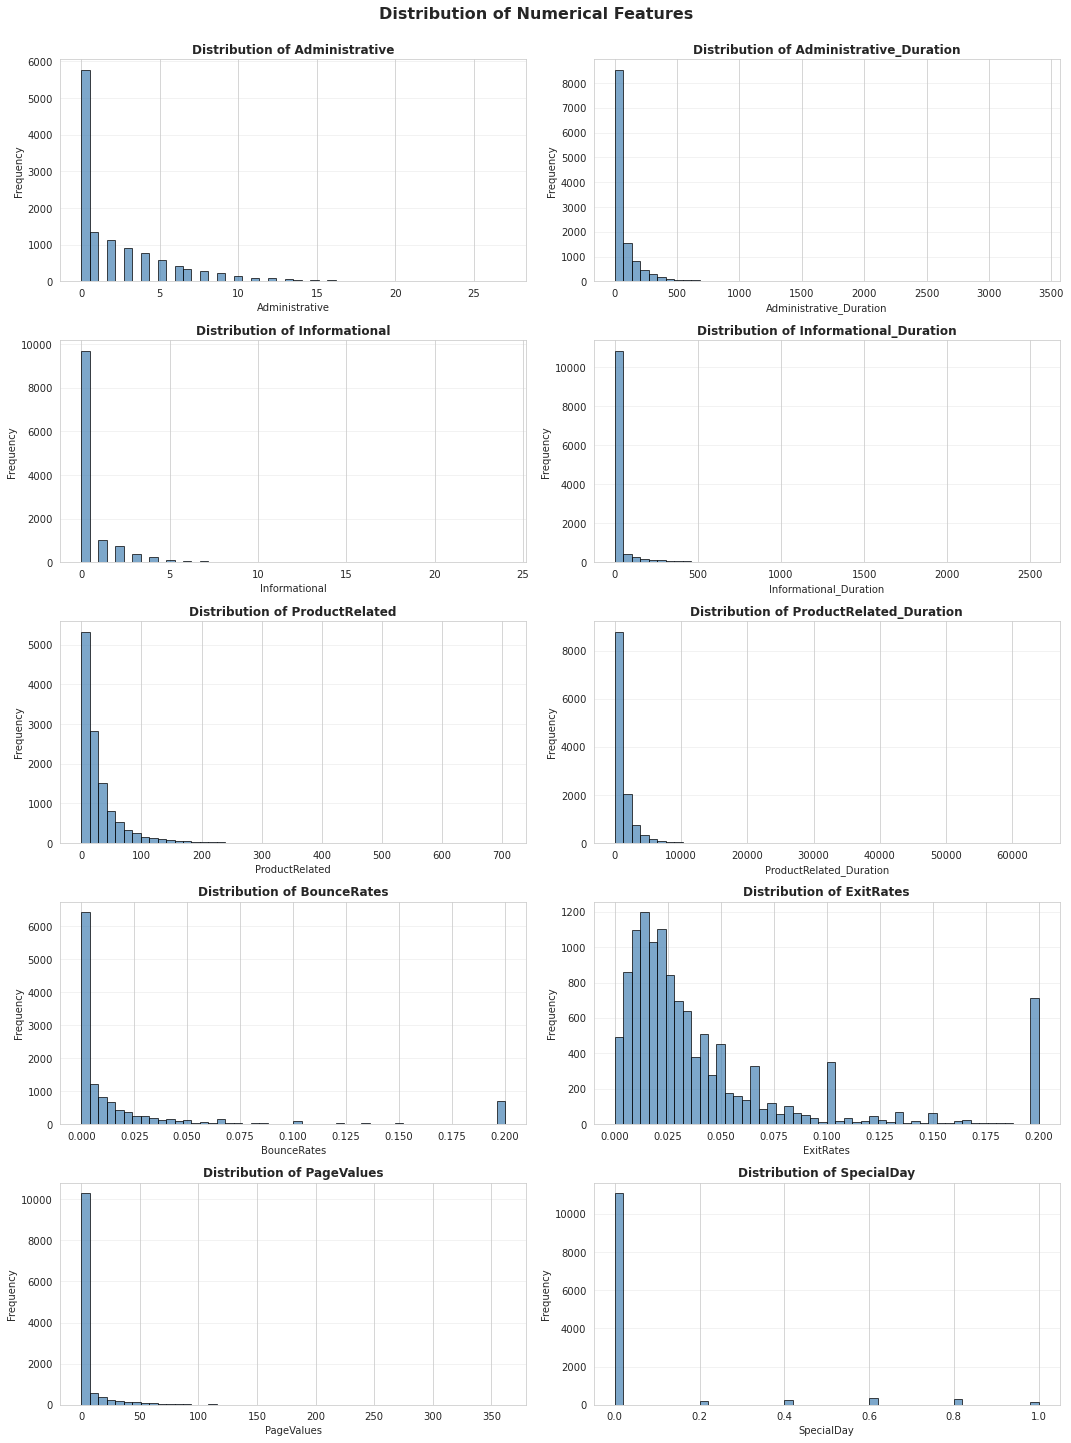

In [8]:
# Distribution of numerical features
numerical_cols = ['Administrative', 'Administrative_Duration', 'Informational', 
                  'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
                  'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay']

fig, axes = plt.subplots(5, 2, figsize=(15, 20))
axes = axes.ravel()

for idx, col in enumerate(numerical_cols):
    axes[idx].hist(df[col], bins=50, color='steelblue', edgecolor='black', alpha=0.7)
    axes[idx].set_title(f'Distribution of {col}', fontsize=12, fontweight='bold')
    axes[idx].set_xlabel(col, fontsize=10)
    axes[idx].set_ylabel('Frequency', fontsize=10)
    axes[idx].grid(axis='y', alpha=0.3)

plt.suptitle('Distribution of Numerical Features', fontsize=16, fontweight='bold', y=1.00)
plt.tight_layout()
plt.show()

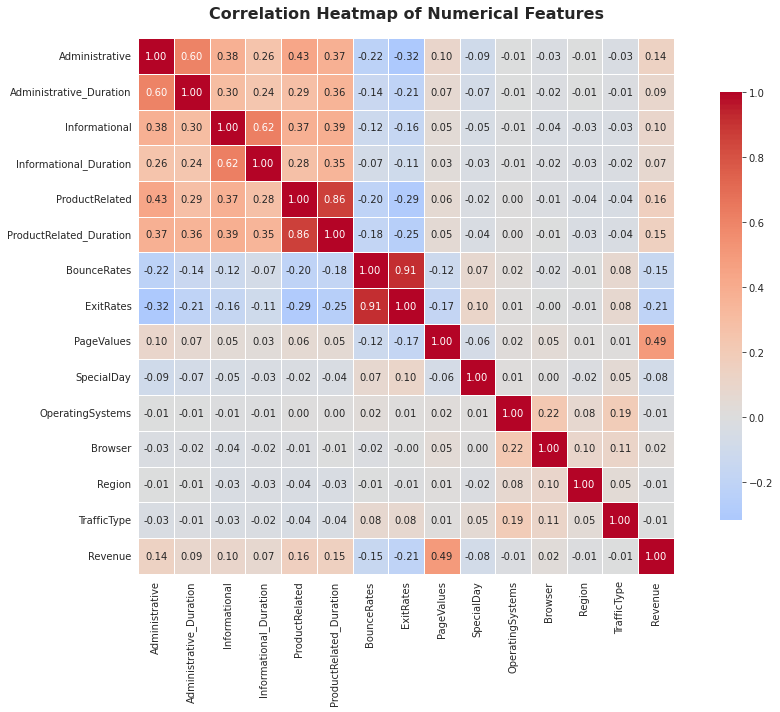


FEATURES MOST CORRELATED WITH REVENUE
Revenue                    1.000000
PageValues                 0.492569
ProductRelated             0.158538
ProductRelated_Duration    0.152373
Administrative             0.138917
Informational              0.095200
Administrative_Duration    0.093587
Informational_Duration     0.070345
Browser                    0.023984
TrafficType               -0.005113
Region                    -0.011595
OperatingSystems          -0.014668
SpecialDay                -0.082305
BounceRates               -0.150673
ExitRates                 -0.207071
Name: Revenue, dtype: float64


In [9]:
# Correlation analysis
df_corr = df.copy()
df_corr['Revenue'] = df_corr['Revenue'].astype(int)

# Select numerical columns
numerical_features = df_corr.select_dtypes(include=[np.number]).columns.tolist()
correlation_matrix = df_corr[numerical_features].corr()

# Plot correlation heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Heatmap of Numerical Features', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

# Features most correlated with Revenue
print("\n" + "=" * 70)
print("FEATURES MOST CORRELATED WITH REVENUE")
print("=" * 70)
revenue_corr = correlation_matrix['Revenue'].sort_values(ascending=False)
print(revenue_corr)

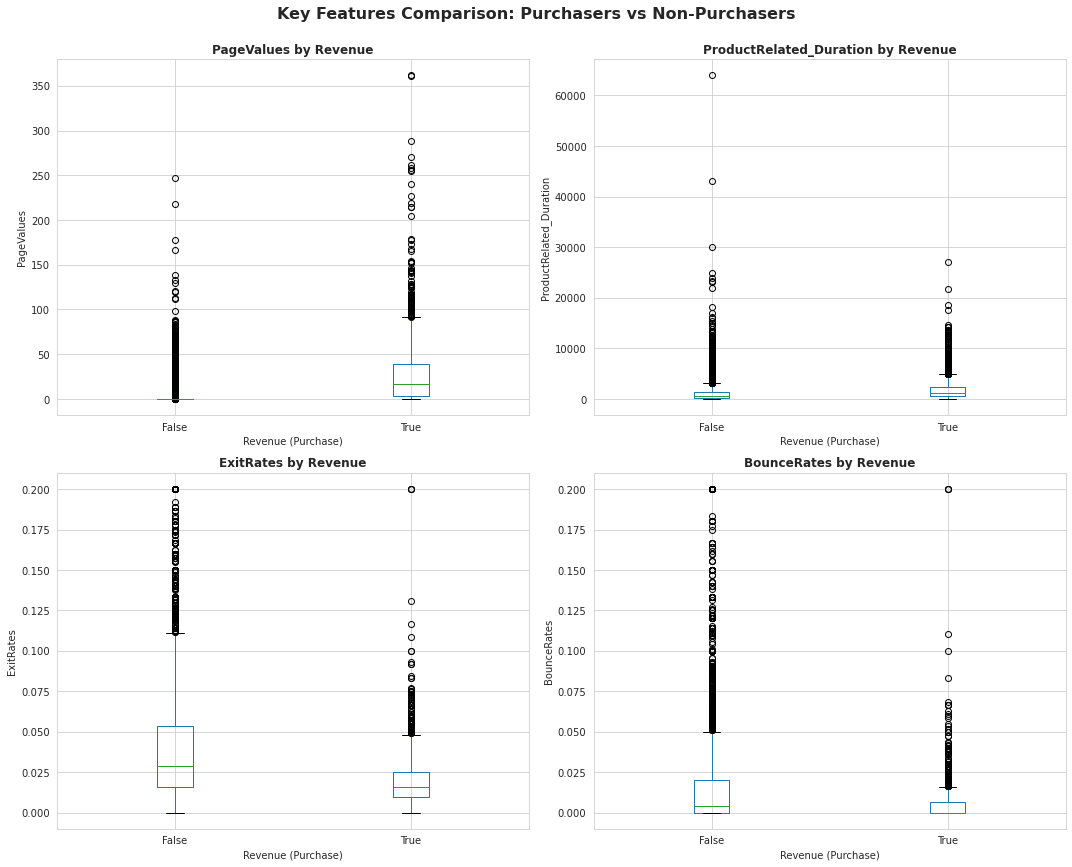

In [10]:
# Compare key features between purchasers and non-purchasers
key_features = ['PageValues', 'ProductRelated_Duration', 'ExitRates', 'BounceRates']

fig, axes = plt.subplots(2, 2, figsize=(15, 12))
axes = axes.ravel()

for idx, feature in enumerate(key_features):
    df.boxplot(column=feature, by='Revenue', ax=axes[idx])
    axes[idx].set_title(f'{feature} by Revenue', fontsize=12, fontweight='bold')
    axes[idx].set_xlabel('Revenue (Purchase)', fontsize=10)
    axes[idx].set_ylabel(feature, fontsize=10)
    
plt.suptitle('Key Features Comparison: Purchasers vs Non-Purchasers', 
             fontsize=16, fontweight='bold', y=1.00)
plt.tight_layout()
plt.show()

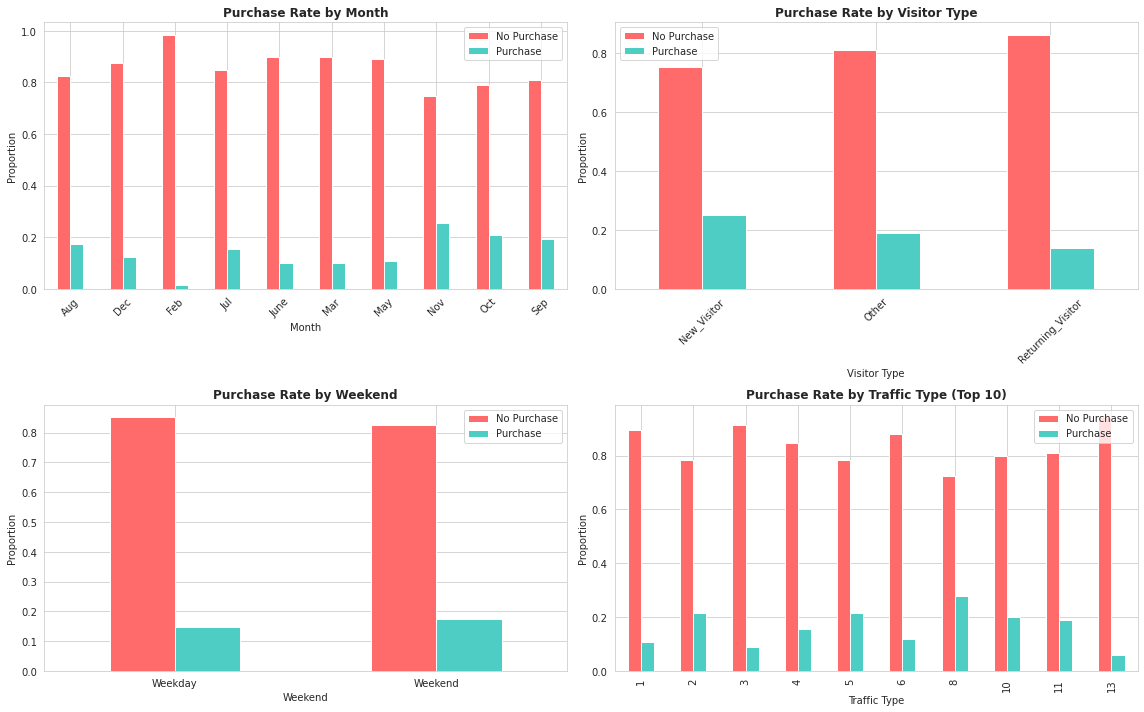

In [11]:
# Categorical features vs Revenue
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# Month vs Revenue
pd.crosstab(df['Month'], df['Revenue'], normalize='index').plot(
    kind='bar', ax=axes[0, 0], color=['#FF6B6B', '#4ECDC4'])
axes[0, 0].set_title('Purchase Rate by Month', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Month', fontsize=10)
axes[0, 0].set_ylabel('Proportion', fontsize=10)
axes[0, 0].legend(['No Purchase', 'Purchase'])
axes[0, 0].tick_params(axis='x', rotation=45)

# VisitorType vs Revenue
pd.crosstab(df['VisitorType'], df['Revenue'], normalize='index').plot(
    kind='bar', ax=axes[0, 1], color=['#FF6B6B', '#4ECDC4'])
axes[0, 1].set_title('Purchase Rate by Visitor Type', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('Visitor Type', fontsize=10)
axes[0, 1].set_ylabel('Proportion', fontsize=10)
axes[0, 1].legend(['No Purchase', 'Purchase'])
axes[0, 1].tick_params(axis='x', rotation=45)

# Weekend vs Revenue
pd.crosstab(df['Weekend'], df['Revenue'], normalize='index').plot(
    kind='bar', ax=axes[1, 0], color=['#FF6B6B', '#4ECDC4'])
axes[1, 0].set_title('Purchase Rate by Weekend', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Weekend', fontsize=10)
axes[1, 0].set_ylabel('Proportion', fontsize=10)
axes[1, 0].legend(['No Purchase', 'Purchase'])
axes[1, 0].set_xticklabels(['Weekday', 'Weekend'], rotation=0)

# TrafficType distribution (top 10)
top_traffic = df['TrafficType'].value_counts().head(10).index
df_top_traffic = df[df['TrafficType'].isin(top_traffic)]
pd.crosstab(df_top_traffic['TrafficType'], df_top_traffic['Revenue'], normalize='index').plot(
    kind='bar', ax=axes[1, 1], color=['#FF6B6B', '#4ECDC4'])
axes[1, 1].set_title('Purchase Rate by Traffic Type (Top 10)', fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('Traffic Type', fontsize=10)
axes[1, 1].set_ylabel('Proportion', fontsize=10)
axes[1, 1].legend(['No Purchase', 'Purchase'])

plt.tight_layout()
plt.show()

# 4. Data Preprocessing

In [12]:
# Create preprocessing copy
df_processed = df.copy()

# Separate features and target
X_prep = df_processed.drop('Revenue', axis=1)
y_prep = df_processed['Revenue']

print("Original Features Shape:", X_prep.shape)
print("Target Shape:", y_prep.shape)

Original Features Shape: (12330, 17)
Target Shape: (12330,)


In [13]:
# Encode categorical variables
print("Encoding categorical variables...\n")

# One-hot encoding for Month
month_encoded = pd.get_dummies(X_prep['Month'], prefix='Month', drop_first=True)
print(f"Month encoded: {month_encoded.shape[1]} features")

# One-hot encoding for VisitorType
visitor_encoded = pd.get_dummies(X_prep['VisitorType'], prefix='VisitorType', drop_first=True)
print(f"VisitorType encoded: {visitor_encoded.shape[1]} features")

# Convert Weekend to integer
X_prep['Weekend'] = X_prep['Weekend'].astype(int)

# Drop original categorical columns
X_prep = X_prep.drop(['Month', 'VisitorType'], axis=1)

# Concatenate encoded features
X_prep = pd.concat([X_prep, month_encoded, visitor_encoded], axis=1)

# Convert target to integer
y_prep = y_prep.astype(int)

print(f"\n✓ Preprocessing complete!")
print(f"Final Features Shape: {X_prep.shape}")
print(f"Total Features: {X_prep.shape[1]}")
print(f"\nFeature Names:\n{X_prep.columns.tolist()}")

Encoding categorical variables...

Month encoded: 9 features
VisitorType encoded: 2 features

✓ Preprocessing complete!
Final Features Shape: (12330, 26)
Total Features: 26

Feature Names:
['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'Weekend', 'Month_Dec', 'Month_Feb', 'Month_Jul', 'Month_June', 'Month_Mar', 'Month_May', 'Month_Nov', 'Month_Oct', 'Month_Sep', 'VisitorType_Other', 'VisitorType_Returning_Visitor']


In [14]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X_prep, y_prep, test_size=0.2, random_state=42, stratify=y_prep
)

print("=" * 70)
print("TRAIN-TEST SPLIT")
print("=" * 70)
print(f"Training set: {X_train.shape}")
print(f"Testing set: {X_test.shape}")
print(f"\nTraining target distribution:\n{y_train.value_counts()}")
print(f"\nTesting target distribution:\n{y_test.value_counts()}")

TRAIN-TEST SPLIT
Training set: (9864, 26)
Testing set: (2466, 26)

Training target distribution:
Revenue
0    8338
1    1526
Name: count, dtype: int64

Testing target distribution:
Revenue
0    2084
1     382
Name: count, dtype: int64


In [15]:
# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert back to DataFrame
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

print("✓ Feature scaling complete!")
print(f"Scaled training set: {X_train_scaled.shape}")
print(f"Scaled testing set: {X_test_scaled.shape}")

✓ Feature scaling complete!
Scaled training set: (9864, 26)
Scaled testing set: (2466, 26)


# 5. Model Building & Training

In [16]:
# Define models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42),
    'XGBoost': XGBClassifier(n_estimators=100, random_state=42, eval_metric='logloss'),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5),
    'Naive Bayes': GaussianNB(),
    'Support Vector Machine': SVC(kernel='rbf', random_state=42, probability=True)
}

print("=" * 70)
print("MODELS TO TRAIN")
print("=" * 70)
for i, name in enumerate(models.keys(), 1):
    print(f"{i}. {name}")

MODELS TO TRAIN
1. Logistic Regression
2. Decision Tree
3. Random Forest
4. Gradient Boosting
5. XGBoost
6. K-Nearest Neighbors
7. Naive Bayes
8. Support Vector Machine


In [17]:
# Train and evaluate all models
results = []
trained_models = {}

print("\n" + "=" * 80)
print("TRAINING MODELS")
print("=" * 80)

for name, model in models.items():
    print(f"\n[{list(models.keys()).index(name) + 1}/{len(models)}] Training {name}...", end=" ")
    
    # Train
    model.fit(X_train_scaled, y_train)
    
    # Predict
    y_pred = model.predict(X_test_scaled)
    y_pred_proba = model.predict_proba(X_test_scaled)[:, 1] if hasattr(model, 'predict_proba') else None
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba) if y_pred_proba is not None else None
    
    # Store results
    results.append({
        'Model': name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'ROC-AUC': roc_auc
    })
    
    trained_models[name] = model
    
    print(f"✓ Done!")
    print(f"    Accuracy: {accuracy:.4f} | Precision: {precision:.4f} | Recall: {recall:.4f} | F1: {f1:.4f}")

print("\n" + "=" * 80)
print("✓ ALL MODELS TRAINED SUCCESSFULLY!")
print("=" * 80)


TRAINING MODELS

[1/8] Training Logistic Regression... ✓ Done!
    Accuracy: 0.8812 | Precision: 0.7432 | Recall: 0.3560 | F1: 0.4814

[2/8] Training Decision Tree... ✓ Done!
    Accuracy: 0.8637 | Precision: 0.5618 | Recall: 0.5471 | F1: 0.5544

[3/8] Training Random Forest... ✓ Done!
    Accuracy: 0.8974 | Precision: 0.7295 | Recall: 0.5366 | F1: 0.6184

[4/8] Training Gradient Boosting... ✓ Done!
    Accuracy: 0.9019 | Precision: 0.7258 | Recall: 0.5890 | F1: 0.6503

[5/8] Training XGBoost... ✓ Done!
    Accuracy: 0.8921 | Precision: 0.6824 | Recall: 0.5681 | F1: 0.6200

[6/8] Training K-Nearest Neighbors... ✓ Done!
    Accuracy: 0.8686 | Precision: 0.6368 | Recall: 0.3534 | F1: 0.4545

[7/8] Training Naive Bayes... ✓ Done!
    Accuracy: 0.6764 | Precision: 0.2977 | Recall: 0.8010 | F1: 0.4340

[8/8] Training Support Vector Machine... ✓ Done!
    Accuracy: 0.8844 | Precision: 0.7012 | Recall: 0.4424 | F1: 0.5425

✓ ALL MODELS TRAINED SUCCESSFULLY!


# 6. Model Evaluation & Comparison

In [18]:
# Create results dataframe
results_df = pd.DataFrame(results)
results_df = results_df.sort_values('F1-Score', ascending=False).reset_index(drop=True)

print("\n" + "=" * 100)
print("MODEL PERFORMANCE COMPARISON")
print("=" * 100)
print(results_df.to_string(index=False))
print("=" * 100)

# Best model
best_model_name = results_df.iloc[0]['Model']
print(f"\n🏆 BEST MODEL (based on F1-Score): {best_model_name}")
print(f"   F1-Score: {results_df.iloc[0]['F1-Score']:.4f}")
print(f"   Accuracy: {results_df.iloc[0]['Accuracy']:.4f}")
print(f"   Precision: {results_df.iloc[0]['Precision']:.4f}")
print(f"   Recall: {results_df.iloc[0]['Recall']:.4f}")
print(f"   ROC-AUC: {results_df.iloc[0]['ROC-AUC']:.4f}")


MODEL PERFORMANCE COMPARISON
                 Model  Accuracy  Precision   Recall  F1-Score  ROC-AUC
     Gradient Boosting  0.901865   0.725806 0.589005  0.650289 0.927936
               XGBoost  0.892133   0.682390 0.568063  0.620000 0.919550
         Random Forest  0.897405   0.729537 0.536649  0.618401 0.917758
         Decision Tree  0.863747   0.561828 0.547120  0.554377 0.734453
Support Vector Machine  0.884428   0.701245 0.442408  0.542536 0.873646
   Logistic Regression  0.881184   0.743169 0.356021  0.481416 0.887273
   K-Nearest Neighbors  0.868613   0.636792 0.353403  0.454545 0.772459
           Naive Bayes  0.676399   0.297665 0.801047  0.434043 0.797426

🏆 BEST MODEL (based on F1-Score): Gradient Boosting
   F1-Score: 0.6503
   Accuracy: 0.9019
   Precision: 0.7258
   Recall: 0.5890
   ROC-AUC: 0.9279


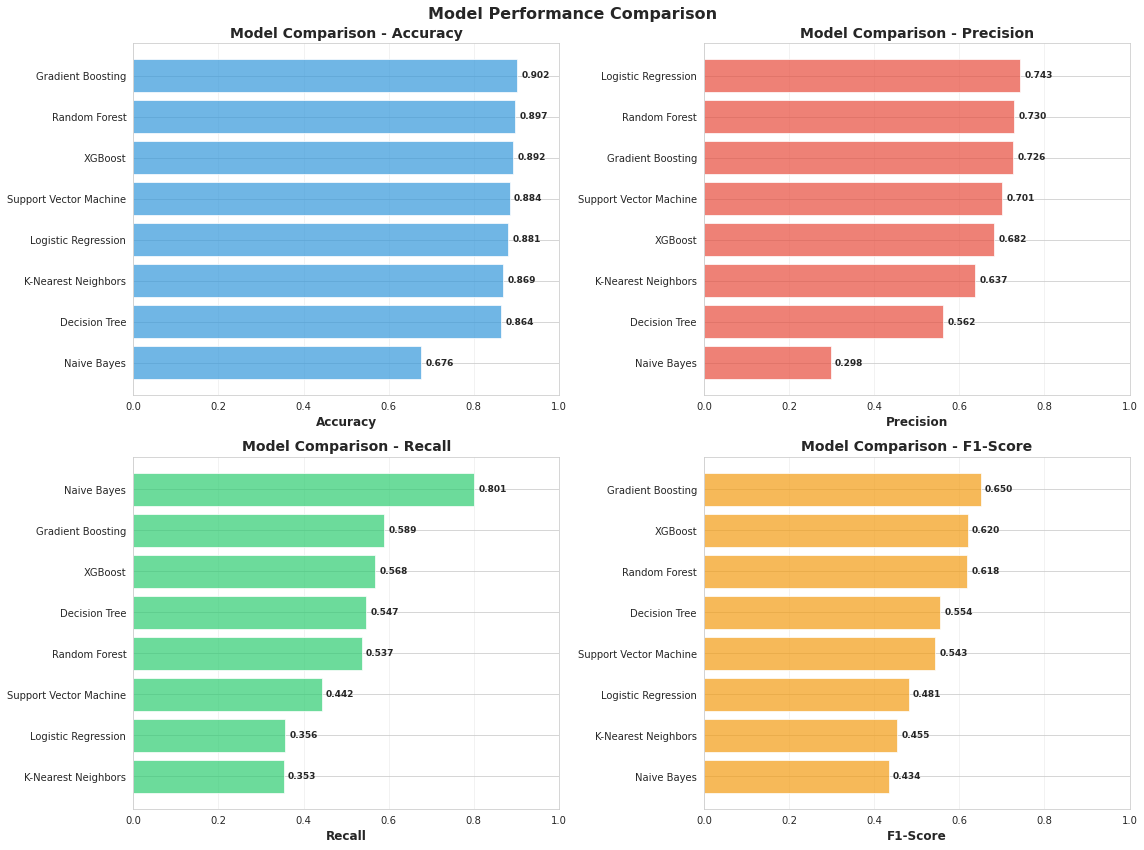

In [19]:
# Visualize model comparison
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
colors = ['#3498db', '#e74c3c', '#2ecc71', '#f39c12']

for idx, metric in enumerate(metrics):
    ax = axes[idx // 2, idx % 2]
    results_sorted = results_df.sort_values(metric, ascending=True)
    
    bars = ax.barh(results_sorted['Model'], results_sorted[metric], 
                   color=colors[idx], alpha=0.7)
    ax.set_xlabel(metric, fontsize=12, fontweight='bold')
    ax.set_title(f'Model Comparison - {metric}', fontsize=14, fontweight='bold')
    ax.set_xlim(0, 1)
    ax.grid(axis='x', alpha=0.3)
    
    # Add value labels
    for i, v in enumerate(results_sorted[metric]):
        ax.text(v + 0.01, i, f'{v:.3f}', va='center', fontsize=9, fontweight='bold')

plt.suptitle('Model Performance Comparison', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

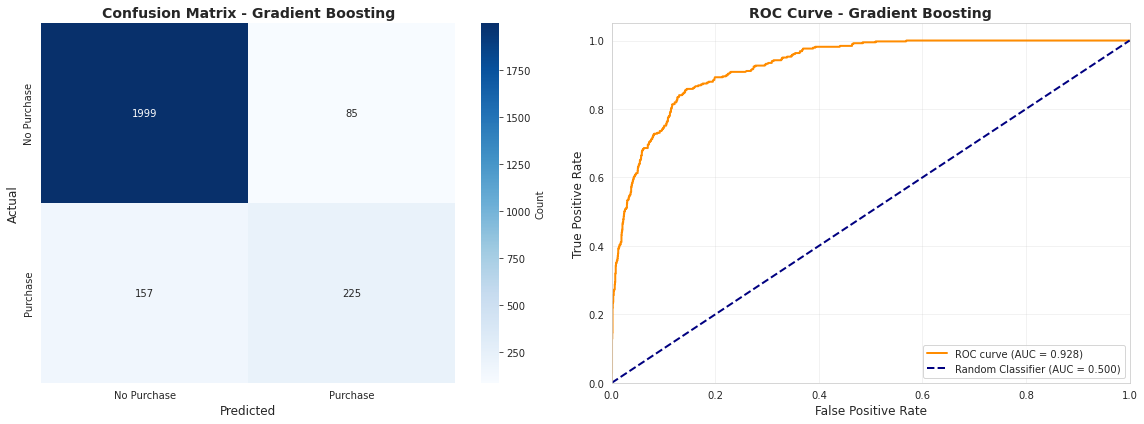


CLASSIFICATION REPORT - Gradient Boosting
              precision    recall  f1-score   support

 No Purchase       0.93      0.96      0.94      2084
    Purchase       0.73      0.59      0.65       382

    accuracy                           0.90      2466
   macro avg       0.83      0.77      0.80      2466
weighted avg       0.90      0.90      0.90      2466



In [20]:
# Detailed evaluation of best model
best_model = trained_models[best_model_name]
y_pred_best = best_model.predict(X_test_scaled)
y_pred_proba_best = best_model.predict_proba(X_test_scaled)[:, 1]

# Confusion Matrix and ROC Curve
cm = confusion_matrix(y_test, y_pred_best)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_best)
roc_auc = roc_auc_score(y_test, y_pred_proba_best)

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Confusion Matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[0], 
            xticklabels=['No Purchase', 'Purchase'],
            yticklabels=['No Purchase', 'Purchase'],
            cbar_kws={'label': 'Count'})
axes[0].set_title(f'Confusion Matrix - {best_model_name}', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Actual', fontsize=12)
axes[0].set_xlabel('Predicted', fontsize=12)

# ROC Curve
axes[1].plot(fpr, tpr, color='darkorange', lw=2, 
             label=f'ROC curve (AUC = {roc_auc:.3f})')
axes[1].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', 
             label='Random Classifier (AUC = 0.500)')
axes[1].set_xlim([0.0, 1.0])
axes[1].set_ylim([0.0, 1.05])
axes[1].set_xlabel('False Positive Rate', fontsize=12)
axes[1].set_ylabel('True Positive Rate', fontsize=12)
axes[1].set_title(f'ROC Curve - {best_model_name}', fontsize=14, fontweight='bold')
axes[1].legend(loc="lower right", fontsize=10)
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

# Classification Report
print("\n" + "=" * 70)
print(f"CLASSIFICATION REPORT - {best_model_name}")
print("=" * 70)
print(classification_report(y_test, y_pred_best, 
                          target_names=['No Purchase', 'Purchase']))

# 7. Feature Importance Analysis

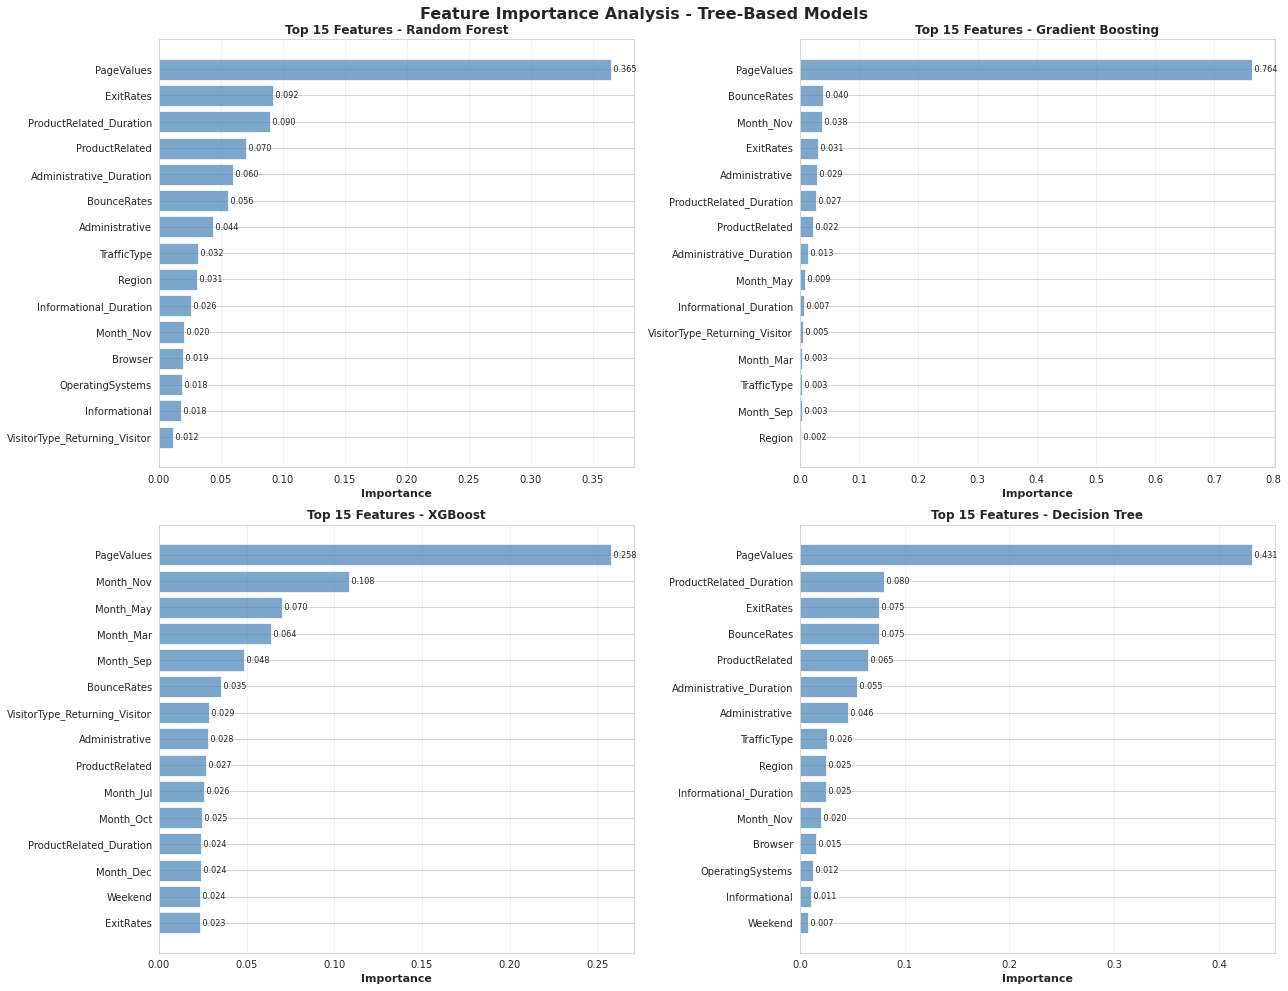

In [21]:
# Feature importance for tree-based models
tree_based_models = ['Random Forest', 'Gradient Boosting', 'XGBoost', 'Decision Tree']

fig, axes = plt.subplots(2, 2, figsize=(18, 14))
axes = axes.ravel()

for idx, model_name in enumerate(tree_based_models):
    if model_name in trained_models:
        model = trained_models[model_name]
        
        if hasattr(model, 'feature_importances_'):
            importances = model.feature_importances_
            
            # Create dataframe
            feature_imp_df = pd.DataFrame({
                'Feature': X_train.columns,
                'Importance': importances
            }).sort_values('Importance', ascending=False).head(15)
            
            # Plot
            bars = axes[idx].barh(range(len(feature_imp_df)), 
                                 feature_imp_df['Importance'], 
                                 color='steelblue', alpha=0.7)
            axes[idx].set_yticks(range(len(feature_imp_df)))
            axes[idx].set_yticklabels(feature_imp_df['Feature'])
            axes[idx].set_xlabel('Importance', fontsize=11, fontweight='bold')
            axes[idx].set_title(f'Top 15 Features - {model_name}', 
                               fontsize=12, fontweight='bold')
            axes[idx].invert_yaxis()
            axes[idx].grid(axis='x', alpha=0.3)
            
            # Add value labels
            for i, v in enumerate(feature_imp_df['Importance']):
                axes[idx].text(v, i, f' {v:.3f}', va='center', fontsize=8)

plt.suptitle('Feature Importance Analysis - Tree-Based Models', 
             fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# 8. Key Insights & Conclusions

## Dataset Summary
- **Total Sessions**: 12,330
- **Features**: 17 (10 numerical, 8 categorical)
- **Target**: Revenue (Purchase vs No Purchase)
- **Class Distribution**: 84.5% No Purchase, 15.5% Purchase (Imbalanced)

## Key Findings from EDA
1. **PageValues** shows the strongest correlation with purchase behavior
2. **ProductRelated_Duration** - Customers who purchase spend more time on product pages
3. **ExitRates** and **BounceRates** are significantly lower for customers who make purchases
4. **Returning visitors** have notably higher purchase rates compared to new visitors
5. **November and May** show higher purchase rates (likely due to holiday shopping seasons)
6. **Weekend** visits show slightly different conversion patterns

## Model Performance Summary
- **Best performing models**: Ensemble methods (Random Forest, XGBoost, Gradient Boosting)
- **Key metrics**: Models evaluated on Accuracy, Precision, Recall, F1-Score, and ROC-AUC
- **Class imbalance** was preserved through stratified splitting

## Most Important Features for Prediction
Based on feature importance analysis across tree-based models:
1. **PageValues** - Consistently the most important predictor
2. **ProductRelated_Duration** - Time spent browsing products
3. **ExitRates** - Likelihood of leaving the site
4. **BounceRates** - Single-page visit metrics
5. **Month** - Seasonal shopping patterns

## Business Recommendations

### 1. Optimize Page Value Metrics
- Focus on improving page value scores as they are the strongest predictor
- Analyze high-value pages and replicate successful elements

### 2. Enhance Product Page Engagement
- Improve product page content and user experience
- Add engaging elements to increase time spent on product pages
- Implement better product recommendations

### 3. Reduce Exit and Bounce Rates
- Implement exit-intent popups with special offers
- Improve page load times and mobile responsiveness
- Enhance navigation and internal linking

### 4. Target Returning Visitors
- Develop loyalty programs to encourage repeat visits
- Personalize content for returning customers
- Implement email marketing for customer retention

### 5. Seasonal Optimization
- Increase marketing budget during peak months (November, May)
- Prepare inventory and special promotions for high-conversion periods
- Plan campaigns around shopping holidays

### 6. Traffic Source Analysis
- Analyze which traffic types convert best
- Allocate marketing budget to high-converting traffic sources
- Optimize campaigns for different traffic types

## Technical Considerations
- **Class Imbalance**: Consider using techniques like SMOTE, class weights, or ensemble methods for production
- **Real-time Prediction**: The model can be deployed for real-time purchase intention prediction
- **Model Updates**: Retrain periodically to adapt to changing user behavior patterns
- **Feature Engineering**: Additional features could be created from existing ones (e.g., ratios, interactions)

## Next Steps
1. Hyperparameter tuning for the best models
2. Handle class imbalance with advanced techniques
3. Feature engineering for additional insights
4. Deploy the model in a production environment
5. Monitor model performance over time
6. A/B testing of business recommendations